# Ex 1
### Precizia masina

In [15]:
u = 1

while 1 + u != 1:
    u /= 10

u *= 10
print(u)

1e-15


In [17]:
if 1 + u != 1:
    print("test 1 passed")
if 1 + u/10 == 1:
    print("test 2 passed")

test 1 passed
test 2 passed


# Ex 2
### Operatiile +c si xc

In [18]:
import random

xAdd = 1.0
xMul = 1.0

y = u/10 
z = u/10

threshold = 100000000000000

add = (xAdd + y) + z == xAdd + (y + z)

if add:
    print("Pentru exemplul cu x = 1.0 operatia este asociativa")
else :
    print("Pentru exemplul cu x = 1.0 operatia este neasociativa")

while (xMul * y) * z == xMul * (y * z):
    xMul = random.randint(1,threshold) / random.randint(1,threshold)

print(f"Pentru x = {xMul} Operatia *c este neasociativa")


Pentru exemplul cu x = 1.0 operatia este neasociativa
Pentru x = 1.0 Operatia +c este neasociativa
Pentru x = 2.064321203446699 Operatia *c este neasociativa


# Ex 3
### Aproximari polinomiale ale fct sin

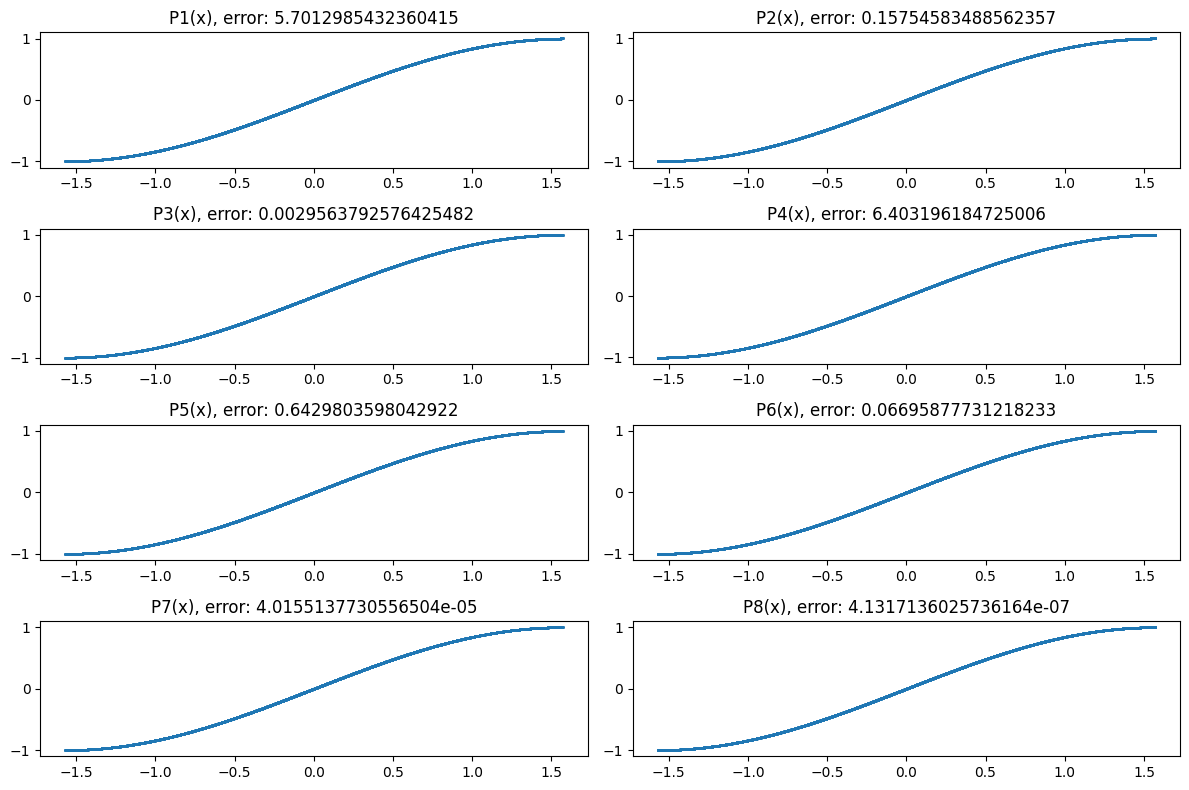

Top 3 cele mai mici erori
P8(x): 4.1317136025736164e-07
P7(x): 4.0155137730556504e-05
P3(x): 0.0029563792576425482


In [33]:
import matplotlib.pyplot as plt
import numpy as np

c1 = 0.16666666666666666666666666666667
c2 = 0.00833333333333333333333333333333
c3 = 1.984126984126984126984126984127e-4
c4 = 2.7557319223985890652557319223986e-6
c5 = 2.5052108385441718775052108385442e-8
c6 = 1.6059043836821614599392377170155e-10

numberOfSamples = 10000
samples = np.random.uniform(-np.pi/2, np.pi/2, numberOfSamples)

P = [
    samples - c1 * (samples ** 3) + c2 * (samples ** 5),
    samples - c1 * (samples ** 3) + c2 * (samples ** 5) - c3 * (samples ** 7),
    samples - c1 * (samples ** 3) + c2 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9),
    samples - 0.166 * (samples ** 3) + 0.00833 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9),
    samples - 0.1666 * (samples ** 3) + 0.008333 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9),
    samples - 0.16666 * (samples ** 3) + 0.0083333 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9),
    samples - c1 * (samples ** 3) + c2 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9) - c5 * (samples ** 11),
    samples - c1 * (samples ** 3) + c2 * (samples ** 5) - c3 * (samples ** 7) + c4 * (samples ** 9) - c5 * (samples ** 11) + c6 * (samples ** 13),
]

trueSin = np.sin(samples)

errors = [np.sum(np.abs(P[i] - trueSin)) for i in range(8)]

labels = [f"P{i+1}(x), error: {errors[i]}" for i in range(8)]

plt.figure(figsize=(12, 8))
for i, p in enumerate(P):
    plt.subplot(4, 2, i + 1)
    plt.scatter(samples, p, s=1, label=labels[i], alpha=0.5)
    plt.title(labels[i])

plt.tight_layout()
plt.show()

sortedErrors = sorted(enumerate(errors), key=lambda x: x[1])

print("Top 3 cele mai mici erori")
for i in range(3):
    print(f"P{sortedErrors[i][0]+1}(x): {sortedErrors[i][1]}")

In [34]:
def horner(P, x):
    n = len(P)
    result = P[0]
    
    for i in range(1, n):
        result = P[i] + result * x
    return result

# P1(x) = x^1 - c1 x^3 + c2 x^5
# Avem coef [1, 0, -c1, 0, c2] -> descr [c2, 0, -c1, 0, 1] pt ca horner sa evalueze corect

P = [c2, 0, -c1, 0, 1]
x = random.randint(1,100)
print(horner(P, x))

454608.4666666667


In [35]:
# Test de timp
import timeit
np.random.seed(42)
coef = np.random.randint(-10, 10, 20)

x_values = np.random.uniform(-10, 10, 100000)

def evaluate_directly(x):
    result = 0
    for i in range(20):
        result += coef[i] * (x ** (15 - i))
    return result

horner_time = timeit.timeit(lambda: [horner(coef, x) for x in x_values], number=1)
direct_time = timeit.timeit(lambda: [evaluate_directly(x) for x in x_values], number=1)

print(f"Timp Horner: {horner_time:.6f} secunde")
print(f"Timp Clasic: {direct_time:.6f} secunde")

Timp Horner: 0.741193 secunde
Timp Clasic: 1.000123 secunde


# BONUS
### continuare ex 3

In [55]:
coef_P1 = [c2, 0, -c1, 0, 1]
coef_P2 = [-c3, 0, c2, 0, -c1, 0, 1]
coef_P3 = [c4, 0, -c3, 0, c2, 0, -c1, 0, 1]
coef_P4 = [c4, 0, -c3, 0, 0.00833, 0, -0.166, 0, 1]
coef_P5 = [c4, 0, -c3, 0, 0.008333, 0, -0.1666, 0, 1]
coef_P6 = [c4, 0, -c3, 0, 0.0083333, 0, -0.16666, 0, 1]
coef_P7 = [-c5, 0, c4, 0, -c3, 0, c2, 0, -c1, 0, 1]
coef_P8 = [c6, 0, -c5, 0, c4, 0, -c3, 0, c2, 0, -c1, 0, 1]

polinomNr1_time = timeit.timeit(lambda: [horner(coef_P1, x) for x in samples], number=1)
polinomNr2_time = timeit.timeit(lambda: [horner(coef_P2, x) for x in samples], number=1)
polinomNr3_time = timeit.timeit(lambda: [horner(coef_P3, x) for x in samples], number=1)
polinomNr4_time = timeit.timeit(lambda: [horner(coef_P4, x) for x in samples], number=1)
polinomNr5_time = timeit.timeit(lambda: [horner(coef_P5, x) for x in samples], number=1)
polinomNr6_time = timeit.timeit(lambda: [horner(coef_P6, x) for x in samples], number=1)
polinomNr7_time = timeit.timeit(lambda: [horner(coef_P7, x) for x in samples], number=1)
polinomNr8_time = timeit.timeit(lambda: [horner(coef_P8, x) for x in samples], number=1)
    
print(f"Timp pentru P1: {polinomNr1_time}")
print(f"Timp pentru P2: {polinomNr2_time}")
print(f"Timp pentru P3: {polinomNr3_time}")
print(f"Timp pentru P4: {polinomNr4_time}")
print(f"Timp pentru P5: {polinomNr5_time}")
print(f"Timp pentru P6: {polinomNr6_time}")
print(f"Timp pentru P7: {polinomNr7_time}")
print(f"Timp pentru P8: {polinomNr8_time}")

Timp pentru P1: 0.01034832900040783
Timp pentru P2: 0.013729672000408755
Timp pentru P3: 0.01606073800030572
Timp pentru P4: 0.018441608001012355
Timp pentru P5: 0.016306180999890785
Timp pentru P6: 0.017318759000772843
Timp pentru P7: 0.020576926001012907
Timp pentru P8: 0.024068693001026986


In [56]:
polynomial_coefficients = [coef_P1, coef_P2, coef_P3, coef_P4, coef_P5, coef_P6, coef_P7, coef_P8]

polinom_times = []
for i, coef in enumerate(polynomial_coefficients):
    time_taken = timeit.timeit(lambda: [horner(coef, x) for x in samples], number=1)
    polinom_times.append((i+1, time_taken))

sorted_times = sorted(polinom_times, key=lambda x: x[1])

for rank, (poly_index, time_taken) in enumerate(sorted_times, 1):
    print(f"{rank}. P{poly_index}: {time_taken:.6f} secunde")

1. P1: 0.010384 secunde
2. P2: 0.013479 secunde
3. P6: 0.016287 secunde
4. P5: 0.016368 secunde
5. P3: 0.017444 secunde
6. P4: 0.018524 secunde
7. P7: 0.020011 secunde
8. P8: 0.023136 secunde
